<a href="https://colab.research.google.com/github/mehmettirpan/Colab_Machine_Learning/blob/main/stock_market_forecasting_aapl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Apple Stock Market Forecasting**


### Kullanacağımız bazı ingilizce kelimelerin anlamları
* Değişkenlerin tamamını global olması adına ingillizce hazırladık.
* Buna bağlı olarak tablolardaki terimler de ingilizce olmalıydı bu terimlerin türkçe karşılıkları şöyle;
* * target -> Hedef
* * subset -> altküme
* * train -> eğitim (eğitim kısmında sık kullandık)
* * validation -> doğrulama
* * sequential -> sıralı - ardışık
* * prediction -> tahmin
* * observation -> gözlem - training observations -> eğitim gözlemleri


# Adımlar

### Veri toplama temizleme ve işleme adımları;
* Bu adımları tek seferde yaptık çünkü veriyi ben kednim hazırlayıp imort ettim yahoofinace' dan. Bu yüzden eksik ya da yanlış bir veri yok çünkü verinin kaynağı ben olduğum için yüklemeden önce test etmiştim

In [1]:
import pandas as pd  #dosyadan verileri(DataFrame) almak için lazım
df = pd.read_csv('/content/AAPL.csv') # AAPL dosyasının konumunu girerek bulunduğu konumdan verilerini çekktik daha doğrusu okuduk
df #df'i yazdırdık

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...,...
10802,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
10803,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
10804,2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
10805,2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100


* Bizim için gerekli olan veri tablosunu aldık kullanmayacağımız veriyi tablodan çıkarttık

In [2]:
df = df[['Date', 'Close']]
#DataFrame in zaman ve kapanış değerlerine odaklanacak şekilde tabloyu ayarladık
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10802,2023-10-18,175.839996
10803,2023-10-19,175.460007
10804,2023-10-20,172.880005
10805,2023-10-23,173.000000


In [3]:
df['Date'] #DataFrame in zaman kısmı için olan bölümünün çıktısını aldık

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10802    2023-10-18
10803    2023-10-19
10804    2023-10-20
10805    2023-10-23
10806    2023-10-24
Name: Date, Length: 10807, dtype: object

* İlerleyen adımlarda zaman verisini kullanacağımız için zamanı ayırıp işleyebileceğimiz bir formata çevirdik. Yani string olarak olan formatı tarih formatına dönüştürdük

In [4]:
import datetime

# Tarih dizisini datetime nesnesine dönüştüren işlev
def str_to_datetime(s):
    split = s.split('-')  # Tarih dizisini parçalara ayırır
    year, month, day = int(split[0]), int(split[1]), int(split[2])  # Yıl, ay ve gün bilgilerini ayırır
    #split[0] sıfırıncı yani ilk değeri dönderecek olupn yanına tire (-) işareti koyuyor
    return datetime.datetime(year=year, month=month, day=day)  # datetime nesnesi oluşturup döndürür

# Örnek kullanım
datetime_object = str_to_datetime('1980-12-12')  # '1980-12-12' tarih dizisini datetime nesnesine dönüştürür
datetime_object

datetime.datetime(1980, 12, 12, 0, 0)

In [5]:
df # Tekrardan çıktı alıp sağlamasını yapıyoruz

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10802,2023-10-18,175.839996
10803,2023-10-19,175.460007
10804,2023-10-20,172.880005
10805,2023-10-23,173.000000


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
# yukarıda 'Date' sütununu aldık string değerlerini tarih anlamı taşıyan yani sadece harf olmayan anlamlara dönüştürdük
df['Date']  # çıktısını aldık

<ipython-input-6-d0f4b91f68d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10802   2023-10-18
10803   2023-10-19
10804   2023-10-20
10805   2023-10-23
10806   2023-10-24
Name: Date, Length: 10807, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date') # Daha sonra verilerin analizini yaparken bu değerleri indeksleme amacıyla kullanmak için Date sütununu diziye dönüştürdük
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-10-18,175.839996
2023-10-19,175.460007
2023-10-20,172.880005


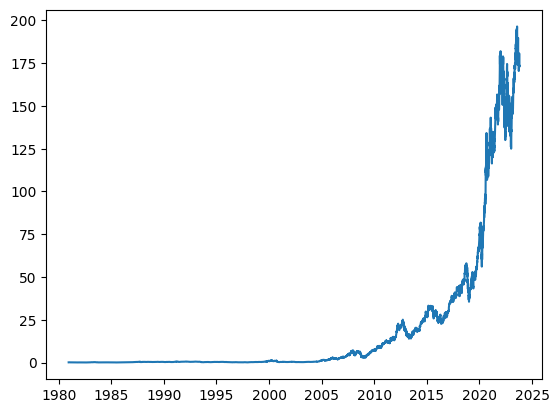

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close']) #burada indeks olarak atadığımız date değerlerine karşılık gelen Close değerlerinden bir çizgi grafiği oluşturduk

### Başlangıç tarihi ve bitiş tarihi arasındaki zaman serisini işleyerek belirli bir pencere boyutunda DataFrame oluşturan kısım.

Bu kodun temel amacı, belirli bir başlangıç ve bitiş tarihine sahip bir DataFrame içindeki zaman serisini işlemek ve her pencere için geçmiş verilere dayalı özellikler ve hedef değerler oluşturmaktır. Bu, gelecekteki bir tarihteki hedef değerlerin, geçmişteki belirli bir pencere boyutundaki verilere dayalı olarak tahmin edilmesine olanak tanır.

Bu tip finansal analizlerde, geçmiş verilere dayalı olarak gelecekteki fiyat değişikliklerini veya eğilimlerini tahmin etmek, yatırımcıların ve analistlerin kararlarını desteklemelerine yardımcı olabilir. Bu nedenle, bu tür bir veri işleme ve analiz yöntemi, finansal piyasalarda risk yönetimi ve karar verme süreçlerinde kullanılabilecek önemli bir araç olabilir.

In [21]:
import numpy as np # sayısal hesaplar için import ettik

# DataFrame'deki tarih serisini pencere boyutuna göre işledik
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  # Başlangıç ve bitiş tarihlerini datetime nesnelerine dönüştürdük
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)


## Veri işleme döngüsü

# Bir döngü başlatılır. Bu döngü, belirtilen tarih aralığında (başlangıç ve bitiş tarihleri arasında)
# bir pencere boyutu kadar önceki günlerin kapanış fiyatlarına dayalı olarak özellik setleri ve hedef değerler oluşturur.

  target_date = first_date # Hedef tarihi başlangıç tarihi olarak ayarla

  dates = [] # Tarih listesi
  X, Y = [], []   # Özellik ve hedef değer listeleri

  last_time = False # Döngü target_date değişkeninin last_date'e eşit olduğu bir durumda sonlanacaktır.
  while True:


## Veri altkümesi oluşturma

# Her iterasyonda, belirtilen tarih (target_date) kadar olan veriyi içeren bir veri alt kümesi (df_subset) oluşturulur.
# burada bir veri alt kümesi oluşturduk çünkü Önceki Günlerin Kapanış Fiyatları ile Tahminde kapanış fiyatlarını tahmin etmede kullanılan önemli bir özelliktir

    df_subset = dataframe.loc[:target_date].tail(n+1) # Belirtilen tarihe kadar olan veri alt kümesini al

    if len(df_subset) != n+1: # df_subset değişkeninin uzunluğunun n'ye eşit olmadığı durumlarda bir hata mesajı yazdırır
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return


## Özellik ve Hedef değerlerin ayıklanması

# Alt kümeden Close sütunundaki değerler çekilir. Bu değerler, bir özellik seti (x) ve bir hedef değer (y) olarak ayrılır.

    values = df_subset['Close'].to_numpy()  # 'Close' sütunundaki değerleri numpy dizisine dönüştür
    x, y = values[:-1], values[-1]  # Özellik ve hedef değerleri ayır


## Veri Listelerine Ekleme

# Oluşturulan özellik seti (x), hedef değeri (y) ve hedef tarihi (target_date) ilgili listelere eklenir.

    dates.append(target_date) # Hedef tarihi listeye ekle
    X.append(x) # Özellik değerini listeye ekle
    Y.append(y) # Hedef değeri listeye ekle


## Sonraki Tarih ve Döngü Kontrolleri

# Bir sonraki tarih belirlenir ve döngü sona erdirilip erdirilmeyeceği kontrol edilir.

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]   # Bir sonraki hafta verilerini al
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0]) # Bir sonraki tarihi al
    next_date_str = next_datetime_str.split('T')[0]    # Tarih dizesini ayrıştır
    year_month_day = next_date_str.split('-')  # Yıl, ay ve gün bilgilerini ayır
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))  # Bir sonraki tarihi datetime nesnesine dönüştür

    if last_time:
      break

    target_date = next_date # Hedef tarihi bir sonraki tarihle güncelle


    if target_date == last_date: # Hedef tarih son tarihe eşitse
      last_time = True # Döngüyü sonlandır


## DataFrame oluşturma
# Buradaki amaç Modelin Eğitim Veri Setini Oluşturmak. Oluşturulan DataFrame, her bir satırında bir hedef tarih ve bu tarih için bir özellik seti içerir.
# Bu, modelin eğitim veri setini oluşturur. Model, önceki günlerin kapanış fiyatlarına dayalı olarak gelecekteki bir günün kapanış fiyatını tahmin etmeyi öğrenir.

  ret_df = pd.DataFrame({})  # Boş bir DataFrame oluştur
  ret_df['Target Date'] = dates  # Tarih listesini 'Target Date' sütunu olarak ekle

  X = np.array(X)  # Özellik değerlerini numpy dizisine dönüştür
  for i in range(0, n):
    X[:, i]  # Özellik değerlerini sıralı olarak al
    ret_df[f'Target-{n-i}'] = X[:, i]  # 'Target' sütunlarını oluştur

  ret_df['Target'] = Y  # 'Target' sütununu ekle


## Sonuç

  return ret_df  # Oluşturulan DataFrame'i döndür


# Başlangıç tarihi ve bitiş tarihi arasındaki zaman serisini işleyerek pencere boyutunda DataFrame oluştur

windowed_df = df_to_windowed_df(df,
                                '2018-03-25',
                                '2023-03-23',
                                n=3)
windowed_df  # Oluşturulan DataFrame'i görüntüle

# Target-3: Üç gün önceki kapanış fiyatı
# Target-2: İki gün önceki kapanış fiyatı
# Target-1: Bir gün önceki kapanış fiyatı
# Target: Tahmin edilmeye çalışılan günün kapanış fiyatı

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-03-25,43.810001,42.817501,42.212502,41.235001
1,2018-03-27,42.212502,41.235001,43.192501,42.084999
2,2018-03-28,41.235001,43.192501,42.084999,41.619999
3,2018-03-29,43.192501,42.084999,41.619999,41.945000
4,2018-04-02,42.084999,41.619999,41.945000,41.669998
...,...,...,...,...,...
1253,2023-03-17,152.589996,152.990005,155.850006,155.000000
1254,2023-03-20,152.990005,155.850006,155.000000,157.399994
1255,2023-03-21,155.850006,155.000000,157.399994,159.279999
1256,2023-03-22,155.000000,157.399994,159.279999,157.830002


### Bu kod parçası, belirli bir pencere boyutundaki DataFrame'i tarih, girdi ve hedef veri setlerine ayırır ve boyutlarını döndürür.

In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  # DataFrame'ı Numpy dizisine dönüştür
  df_as_np = windowed_dataframe.to_numpy()

  # Tarihleri al
  dates = df_as_np[:, 0]

  # Girdi matrisini oluştur
  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  # Hedef sütununu al
  Y = df_as_np[:, -1]

  # Tarihleri, girdileri (X) ve hedefleri (Y) döndür
  return dates, X.astype(np.float32), Y.astype(np.float32)

# Verilen pencere boyutundaki DataFrame'i tarih, girdi ve hedef veri setlerine ayır ve boyutlarını döndür
dates, X, y = windowed_df_to_date_X_y(windowed_df)

# Tarihlerin, girdilerin ve hedeflerin boyutlarını göster
dates.shape, X.shape, y.shape


((1258,), (1258, 3, 1), (1258,))

### Bu kod parçası, veri setini eğitim, doğrulama ve test setlerine bölmek için indeksleri belirler ve her bir veri setini oluşturur.

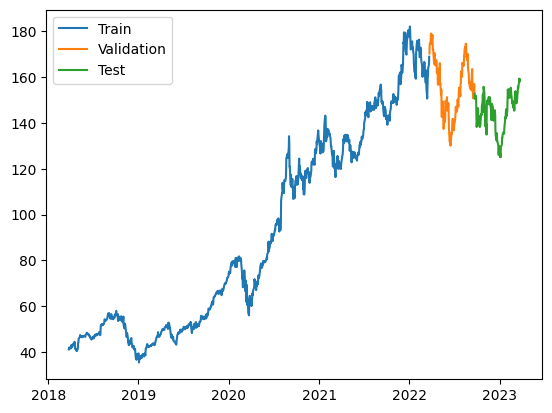

In [11]:
# Veri setini eğitim, doğrulama ve test setlerine bölmek için indeksleri belirle
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Eğitim veri setini oluştur
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# Doğrulama veri setini oluştur
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# Test veri setini oluştur
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Her bir veri setinin hedef değerlerini tarihlerine bağlı olarak çizdir
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

# Çizimlerin neyi temsil ettiğini belirle
plt.legend(['Train', 'Validation', 'Test'])

###Bu kısım, tensorflow.keras kütüphanesi kullanılarak bir LSTM modeli oluşturur, derler ve eğitir.

In [12]:
from tensorflow.keras.models import Sequential #Sequential sınıfı, bir modelin sıralı bir şekilde birbirine bağlı katmanlardan oluşmasını sağlar.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Model oluşturma ve tanımlama
model = Sequential([layers.Input((3, 1)),  # Giriş katmanı boyutunu belirt (3, 1)
                    layers.LSTM(64),  # 64 hücreye sahip bir LSTM katmanı ekle
                    layers.Dense(32, activation='relu'),  # 32 nöronlu, ReLU aktivasyonlu bir yoğun katman ekle
                    layers.Dense(32, activation='relu'),  # 32 nöronlu, ReLU aktivasyonlu bir yoğun katman daha ekle
                    layers.Dense(1)])  # 1 nöronlu çıkış katmanı ekle

# Modelin derlenmesi
model.compile(loss='mse',  # Kayıp fonksiyonu olarak ortalama karesel hata (MSE) kullan
              optimizer=Adam(learning_rate=0.001),  # Optimizasyon için Adam optimize edici kullan ve öğrenme hızını 0.001 olarak belirle
              metrics=['mean_absolute_error'])  # İzlenecek metrik olarak ortalama mutlak hata (MAE) seç

# Modelin eğitilmesi
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)  # Modeli eğitmek için eğitim ve doğrulama veri setlerini kullan, 100 epoch boyunca eğitim yap



Epoch 1/100
32/32 [==============================] - 4s 32ms/step - loss: 9898.4141 - mean_absolute_error: 89.5276 - val_loss: 23413.5234 - val_mean_absolute_error: 152.5142
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 8756.2676 - mean_absolute_error: 82.5410 - val_loss: 19939.4258 - val_mean_absolute_error: 140.6566
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 5198.5830 - mean_absolute_error: 56.1229 - val_loss: 9197.1465 - val_mean_absolute_error: 95.0770
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 2039.6499 - mean_absolute_error: 38.7433 - val_loss: 3796.1873 - val_mean_absolute_error: 60.3649
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 1483.9176 - mean_absolute_error: 34.4245 - val_loss: 3011.5264 - val_mean_absolute_error: 53.5843
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 391.3625 - mean_absolute_error: 12.3142 - val_loss: 435.2050 - val_

# Veri Setlerinde Doğrulama Türleri ve Amaçlarımız


1.   Eğitim Seti: Bu veri seti, modelin parametrelerini belirlemek ve eğitmek için kullanılır. Model, eğitim seti üzerindeki verileri kullanarak belirli bir algoritma aracılığıyla öğrenir ve eğitim setindeki örnekler üzerindeki performansını artırır.

2.   Doğrulama Seti: Doğrulama seti, modelin eğitim seti üzerindeki performansını değerlendirmek için kullanılır. Model, doğrulama seti üzerindeki verileri kullanarak eğitim sırasında overfitting'i (aşırı öğrenme) veya underfitting'i (yetersiz öğrenme) kontrol etmek ve modelin genelleme performansını değerlendirmek için kullanılır. Doğrulama seti, modelin eğitim süreci boyunca ayarlamalar yapmak ve performansını optimize etmek için kullanılır.

3.   Test Seti: Test seti, modelin gerçek dünya verileri üzerindeki performansını değerlendirmek için kullanılır. Modelin test seti üzerindeki performansı, modelin genelleme yeteneğini değerlendirir. Test seti, modelin gerçek dünya verilerine ne kadar iyi uygulandığını anlamak için kullanılır.


**Bu üç ayrı veri seti, modelin doğru bir şekilde eğitilmesi, doğrulanması ve test edilmesi için önemlidir. Bu yöntem, modelin yanlış bir şekilde eğitilmesi veya test edilmesi durumunda, aşırı uyum (overfitting) veya yetersiz uyum (underfitting) gibi problemlerin tespit edilmesine yardımcı olur. Ayrıca, modelin gerçek dünya verilerine ne kadar iyi uygulandığını anlamak için de önemlidir.**

Bu kod, eğitim veri seti üzerindeki tahminlerin ve gerçek gözlemlerin bir çizgi grafiği üzerinde gösterilmesini sağlar.

32/32 [==============================] - 1s 3ms/step


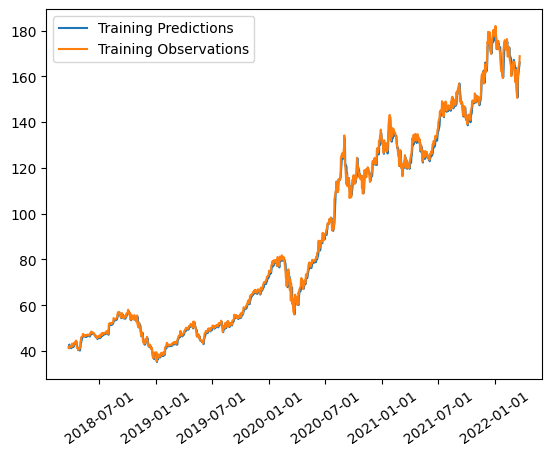

In [13]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Grafiği oluştur
fig, ax = plt.subplots()

# Model üzerinde eğitim veri seti (X_train) üzerinde tahminleme yap
train_predictions = model.predict(X_train).flatten()

# Eğitim tarihlerine karşılık gelen tahminleri ve gerçek değerleri içeren bir çizgi grafiği oluştur
ax.plot(dates_train, train_predictions, label='Training Predictions')
ax.plot(dates_train, y_train, label='Training Observations')

# X ekseni tarih formatını düzenleme
date_format = DateFormatter("%Y-%m-%d")  # İstediğiniz tarih formatını belirleyin yani şöyle %Y dört haneli yıl formatı, %m 2 haneli ay formatı ve %d 2 haneli olarak gün formatını belirlemiş olur
ax.xaxis.set_major_formatter(date_format)

# X ekseni etiketlerini döndürme
plt.xticks(rotation=35)  # İhtiyaca göre döndürme açısını ayarlayabilirsiniz

# Grafiğe açıklama ekle
plt.legend()

# Grafiği göster
plt.show()


Bu kod, doğrulama veri seti üzerindeki tahminlerin ve gerçek gözlemlerin bir çizgi grafiği üzerinde gösterilmesini sağlar.

4/4 [==============================] - 0s 6ms/step


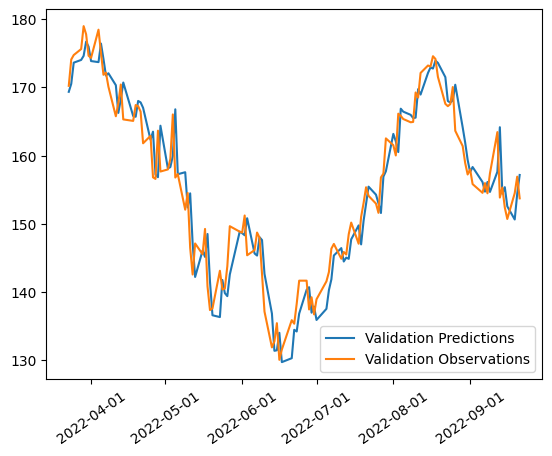

In [14]:
# Grafiği oluştur
fig, ax = plt.subplots()

val_predictions = model.predict(X_val).flatten() #modelin doğrulama veri seti (X_val) üzerinde tahminler yapmasını sağlar. flatten() fonksiyonu, tahminlerin boyutunu düzleştirir.

# Doğrulama tarihlerine karşılık gelen tahminleri ve gerçek değerleri içeren bir çizgi grafiği oluştur
ax.plot(dates_val, val_predictions, label='Validation Predictions')
ax.plot(dates_val, y_val, label='Validation Observations')

# X ekseni tarih formatını düzenleme
date_format = DateFormatter("%Y-%m-%d")  # İstediğiniz tarih formatını belirleyin
ax.xaxis.set_major_formatter(date_format)

# X ekseni etiketlerini döndürme
plt.xticks(rotation=35)  # İhtiyaca göre döndürme açısını ayarlayabilirsiniz

# Grafiğe açıklama ekle
plt.legend()

# Grafiği göster
plt.show()


Bu kod, test veri seti üzerindeki tahminlerin ve gerçek gözlemlerin bir çizgi grafiği üzerinde gösterilmesini sağlar.

4/4 [==============================] - 0s 4ms/step


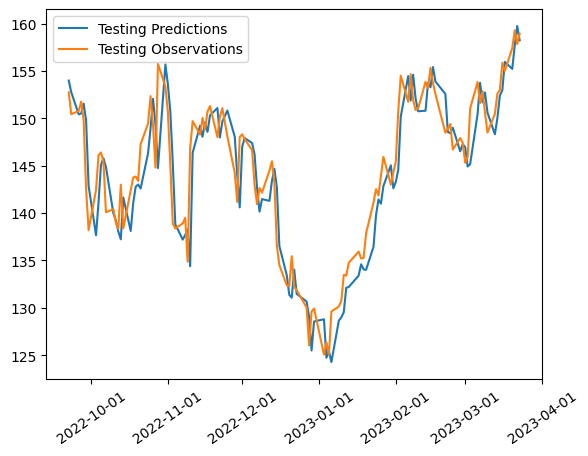

In [15]:
# Grafiği oluştur
fig, ax = plt.subplots()

# Model üzerinde test veri seti (X_test) üzerinde tahminleme yap
test_predictions = model.predict(X_test).flatten()

# Test tarihlerine karşılık gelen tahminleri ve gerçek değerleri içeren bir çizgi grafiği oluştur
ax.plot(dates_test, test_predictions, label='Testing Predictions')
ax.plot(dates_test, y_test, label='Testing Observations')

# X ekseni tarih formatını düzenleme
date_format = DateFormatter("%Y-%m-%d")  # İstediğiniz tarih formatını belirleyin
ax.xaxis.set_major_formatter(date_format)

# X ekseni etiketlerini döndürme
plt.xticks(rotation=35)  # İhtiyaca göre döndürme açısını ayarlayabilirsiniz

# Grafiğe açıklama ekle
plt.legend()

# Grafiği göster
plt.show()



Bu kod, farklı veri setleri üzerinde yapılan tahminlerin ve gerçek gözlemlerin görselleştirilmesini sağlar.

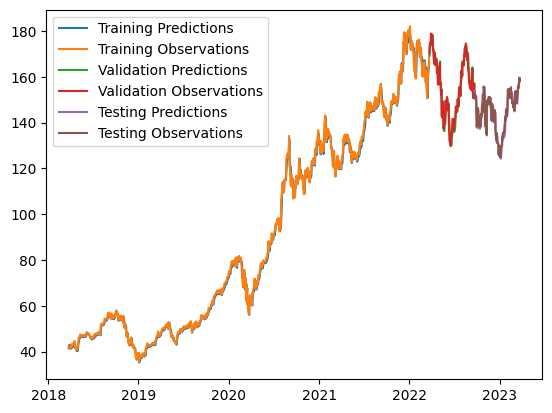

In [16]:
plt.plot(dates_train, train_predictions) # eğitim veri seti için yapılan tahminleri görselleştirir.
plt.plot(dates_train, y_train) # eğitim veri seti için gerçek gözlemleri görselleştirir.
plt.plot(dates_val, val_predictions) # doğrulama veri seti için yapılan tahminleri görselleştirir.
plt.plot(dates_val, y_val) # doğrulama veri seti için gerçek gözlemleri görselleştirir.
plt.plot(dates_test, test_predictions) # test veri seti için yapılan tahminleri görselleştirir.
plt.plot(dates_test, y_test) # test veri seti için gerçek gözlemleri görselleştirir.
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

Bu kod, yinelemeli tahminlerin yapılmasını ve depolanmasını sağlar. Özellikle, mevcut modelin son tahminini kullanarak gelecekteki tarihler için yinelemeli tahminler yapar. Bu yinelemeli tahminler, modelin önceki tahminlerini son pencereye ekleyerek elde edilir.

In [17]:
from copy import deepcopy

recursive_predictions = []  # Yinelemeli tahminlerin depolanacağı liste
recursive_dates = np.concatenate([dates_val, dates_test])  # Doğrulama ve test tarihlerini birleştir

# Her hedef tarih için
for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])  # Eğitim veri setinin son penceresini derinlemesine kopyala
  next_prediction = model.predict(np.array([last_window])).flatten()  # Modelden bir sonraki tahmini al
  recursive_predictions.append(next_prediction)  # Yinelemeli tahmin listesine ekle
  last_window[-1] = next_prediction  # Son pencereyi güncelle


1/1 [==============================] - 0s 25ms/step


Bu satır, eğitim verileri ile modelin eğittiği ve tahmin yaptığı verileri aynı grafik üzerinde karşılaştırmak için kullanılır. Böylece gerçek verilere modelin ne kadar yakın tahminler yaptığını görmek mümkün olur.

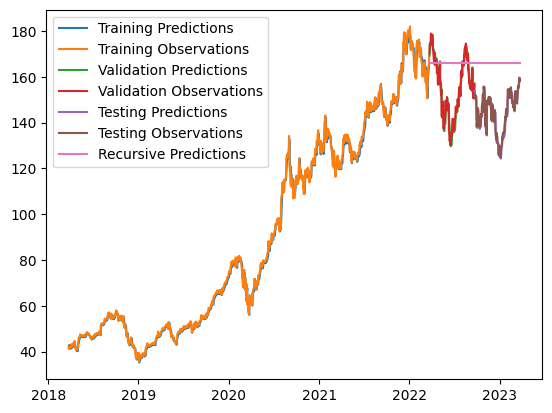

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, val_predictions)
r2

0.9173148154589571

In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_predictions)
r2

0.8349334651560756